In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import datetime

weather_df = pd.read_csv('/content/drive/MyDrive/weather_data.csv')
energy_df = pd.read_csv('/content/drive/MyDrive/energy_data.csv')


In [2]:
weather_df.head(10)

,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,34.98,partly-cloudy-night,0.64,10.00,Partly Cloudy,1017.69,7.75,0.29,1388534400,279,0.0,23.89,0.0
1,16.49,clear-night,0.62,10.00,Clear,1022.76,2.71,0.06,1388538000,195,0.0,5.87,0.0
2,14.63,clear-night,0.68,10.00,Clear,1022.32,4.84,0.03,1388541600,222,0.0,6.17,0.0
3,13.31,clear-night,0.71,10.00,Clear,1021.64,4.00,0.14,1388545200,209,0.0,5.63,0.0
4,13.57,clear-night,0.71,9.93,Clear,1020.73,3.67,0.04,1388548800,217,0.0,5.87,0.0
5,20.31,clear-night,0.47,10.00,Clear,1023.25,12.65,0.00,1388552400,283,0.0,3.30,0.0
6,19.22,clear-night,0.48,10.00,Clear,1023.21,9.99,0.00,1388556000,283,0.0,2.69,0.0
7,18.10,clear-night,0.52,10.00,Clear,1024.25,7.76,0.00,1388559600,255,0.0,3.42,0.0
8,17.47,clear-night,0.55,10.00,Clear,1025.02,7.73,0.00,1388563200,245,0.0,4.00,0.0
9,15.63,clear-night,0.61,10.00,Clear,1025.16,5.76,0.00,1388566800,220,0.0,4.45,0.0


In [3]:
energy_df.head(10)

,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
0,2014-01-01 00:00:00,0.304439,0.0,0.304439,0.000058,0.009531,0.005336,0.000126,0.011175,0.003836,0.004836,0.002132,0.000009,0.007159,0.063666,0.004299,0.004733,0.042589
1,2014-01-01 00:30:00,0.656771,0.0,0.656771,0.001534,0.364338,0.005522,0.000043,0.003514,0.003512,0.004888,0.002137,0.000107,0.007221,0.064698,0.003589,0.004445,0.096008
2,2014-01-01 01:00:00,0.612895,0.0,0.612895,0.001847,0.417989,0.005504,0.000044,0.003528,0.003484,0.004929,0.002052,0.000170,0.007197,0.065109,0.003522,0.004396,0.025928
3,2014-01-01 01:30:00,0.683979,0.0,0.683979,0.001744,0.410653,0.005556,0.000059,0.003499,0.003476,0.004911,0.002068,0.000121,0.007236,0.065032,0.003404,0.004262,0.105472
4,2014-01-01 02:00:00,0.197809,0.0,0.197809,0.000030,0.017152,0.005302,0.000119,0.003694,0.003865,0.004876,0.002087,0.000052,0.007133,0.062451,0.003915,0.004407,0.016798
5,2014-01-01 02:30:00,0.397099,0.0,0.397099,0.000442,0.126960,0.005415,0.000054,0.003627,0.003749,0.004891,0.002133,0.000024,0.007187,0.063814,0.003813,0.004398,0.106717
6,2014-01-01 03:00:00,0.590319,0.0,0.590319,0.001858,0.420358,0.005509,0.000043,0.003562,0.003541,0.005007,0.002072,0.000197,0.007208,0.065277,0.003008,0.004008,0.006479
7,2014-01-01 03:30:00,0.538266,0.0,0.538266,0.001071,0.257654,0.005507,0.000020,0.003582,0.003549,0.004837,0.002136,0.000047,0.007198,0.063142,0.004142,0.004565,0.121088
8,2014-01-01 04:00:00,0.189187,0.0,0.189187,0.000056,0.009462,0.005302,0.000141,0.003708,0.003837,0.004858,0.002086,0.000034,0.007107,0.070109,0.004202,0.004704,0.011131
9,2014-01-01 04:30:00,0.653232,0.0,0.653232,0.001663,0.387637,0.005552,0.000033,0.003532,0.003463,0.004878,0.002112,0.000118,0.007203,0.064450,0.003669,0.004194,0.104737


## Task 1

In [4]:
# group weather_df by date
weather_df["Date"] = [datetime.datetime.fromtimestamp(time).strftime("%Y-%m-%d") for time in weather_df.time]
weather_df_gbdate = weather_df.groupby("Date").mean().reset_index()

In [5]:
weather_df_gbdate

,Date,temperature,humidity,visibility,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,2014-01-01,20.110833,0.556667,9.970000,1025.395000,6.820417,0.031304,1.388576e+09,252.291667,0.000000,6.362083,0.000000
1,2014-01-02,16.382500,0.784583,3.834583,1023.465833,7.433750,0.354444,1.388662e+09,53.458333,0.002004,10.737083,0.074583
2,2014-01-03,6.256667,0.680833,4.509167,1014.428750,12.828333,0.186364,1.388749e+09,207.333333,0.002029,-2.337500,0.080000
3,2014-01-04,2.711667,0.617083,9.822917,1030.096250,5.248333,0.001667,1.388835e+09,240.166667,0.000000,-8.352083,0.000000
4,2014-01-05,17.654167,0.682083,9.134583,1025.275000,3.417083,0.010952,1.388921e+09,208.958333,0.000033,8.615000,0.000417
...,...,...,...,...,...,...,...,...,...,...,...,...
360,2014-12-27,35.487083,0.756250,9.246250,1022.081667,3.677083,0.030417,1.419680e+09,243.791667,0.000000,27.992500,0.000000
361,2014-12-28,41.892917,0.763750,9.332917,1013.549167,6.587917,0.245909,1.419766e+09,224.458333,0.003996,34.876250,0.137917
362,2014-12-29,34.728333,0.592083,9.997083,1018.870833,8.129583,0.119167,1.419853e+09,281.833333,0.000000,21.570000,0.000000
363,2014-12-30,24.846667,0.488750,9.998333,1026.102083,7.566667,0.031250,1.419939e+09,312.041667,0.000000,7.772083,0.000000


In [6]:
# group energy_df by date
energy_df["Date"] = [str(val).split()[0] for val in energy_df["Date & Time"]]
energy_df_gbdate = energy_df.groupby("Date").sum().reset_index()

In [7]:
energy_df_gbdate

,Date,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
0,2014-01-01,65.013592,0.0,65.013592,0.042977,8.814319,1.137579,0.750298,0.567603,0.178529,0.261094,0.254839,31.938131,0.350291,3.272944,0.200970,4.997037,4.639598
1,2014-01-02,32.305336,0.0,32.305336,0.047452,10.830045,0.600321,0.323182,0.506440,0.178024,0.282479,0.798316,5.423866,0.346679,3.475469,0.207041,1.534426,3.881399
2,2014-01-03,31.164468,0.0,31.164468,0.055865,12.417151,0.442453,0.004276,0.507426,0.176649,0.279159,0.746972,0.005554,0.344061,3.615520,0.201975,1.667553,3.671391
3,2014-01-04,45.287782,0.0,45.287782,0.048827,11.147332,0.674477,1.046294,0.515988,0.180056,0.344005,0.640721,19.994908,0.346872,3.700408,0.203913,1.029198,3.357907
4,2014-01-05,36.316643,0.0,36.316643,0.039831,9.301135,0.686189,0.235143,0.519449,0.178556,0.348489,0.584570,9.493912,0.346070,3.699178,0.197897,1.619991,4.373730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2014-12-27,35.046127,0.0,35.046127,0.029014,4.306682,0.475110,0.019649,0.825872,0.112661,0.255620,5.422751,0.005953,0.015400,0.473471,0.668127,0.642506,3.839653
361,2014-12-28,37.695824,0.0,37.695824,0.044794,4.640888,0.456018,0.035832,0.874563,0.115673,0.257369,11.602281,0.008270,0.018872,0.473571,0.657405,0.311556,3.510436
362,2014-12-29,28.675929,0.0,28.675929,0.037950,6.143640,0.463515,0.020115,0.552812,0.112204,0.274396,5.951963,0.005461,0.015199,0.493595,0.670818,0.279923,3.702587
363,2014-12-30,31.514313,0.0,31.514313,0.062139,7.283703,0.467821,0.033911,0.764434,0.115933,0.238277,11.100021,0.008893,0.020299,0.512197,0.680587,0.623743,4.555577


In [8]:
# merge two dataframes
merged_df = pd.merge(weather_df_gbdate, energy_df_gbdate, on='Date')

In [9]:
merged_df

,Date,temperature,humidity,visibility,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,...,First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
0,2014-01-01,20.110833,0.556667,9.970000,1025.395000,6.820417,0.031304,1.388576e+09,252.291667,0.000000,...,0.567603,0.178529,0.261094,0.254839,31.938131,0.350291,3.272944,0.200970,4.997037,4.639598
1,2014-01-02,16.382500,0.784583,3.834583,1023.465833,7.433750,0.354444,1.388662e+09,53.458333,0.002004,...,0.506440,0.178024,0.282479,0.798316,5.423866,0.346679,3.475469,0.207041,1.534426,3.881399
2,2014-01-03,6.256667,0.680833,4.509167,1014.428750,12.828333,0.186364,1.388749e+09,207.333333,0.002029,...,0.507426,0.176649,0.279159,0.746972,0.005554,0.344061,3.615520,0.201975,1.667553,3.671391
3,2014-01-04,2.711667,0.617083,9.822917,1030.096250,5.248333,0.001667,1.388835e+09,240.166667,0.000000,...,0.515988,0.180056,0.344005,0.640721,19.994908,0.346872,3.700408,0.203913,1.029198,3.357907
4,2014-01-05,17.654167,0.682083,9.134583,1025.275000,3.417083,0.010952,1.388921e+09,208.958333,0.000033,...,0.519449,0.178556,0.348489,0.584570,9.493912,0.346070,3.699178,0.197897,1.619991,4.373730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2014-12-27,35.487083,0.756250,9.246250,1022.081667,3.677083,0.030417,1.419680e+09,243.791667,0.000000,...,0.825872,0.112661,0.255620,5.422751,0.005953,0.015400,0.473471,0.668127,0.642506,3.839653
361,2014-12-28,41.892917,0.763750,9.332917,1013.549167,6.587917,0.245909,1.419766e+09,224.458333,0.003996,...,0.874563,0.115673,0.257369,11.602281,0.008270,0.018872,0.473571,0.657405,0.311556,3.510436
362,2014-12-29,34.728333,0.592083,9.997083,1018.870833,8.129583,0.119167,1.419853e+09,281.833333,0.000000,...,0.552812,0.112204,0.274396,5.951963,0.005461,0.015199,0.493595,0.670818,0.279923,3.702587
363,2014-12-30,24.846667,0.488750,9.998333,1026.102083,7.566667,0.031250,1.419939e+09,312.041667,0.000000,...,0.764434,0.115933,0.238277,11.100021,0.008893,0.020299,0.512197,0.680587,0.623743,4.555577


## Task 2

In [10]:
merged_df.columns

Index(['Date', 'temperature', 'humidity', 'visibility', 'pressure',
       'windSpeed', 'cloudCover', 'time', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability', 'use [kW]', 'gen [kW]', 'Grid [kW]',
       'AC [kW]', 'Furnace [kW]', 'Cellar Lights [kW]', 'Washer [kW]',
       'First Floor lights [kW]', 'Utility Rm + Basement Bath [kW]',
       'Garage outlets [kW]', 'MBed + KBed outlets [kW]',
       'Dryer + egauge [kW]', 'Panel GFI (central vac) [kW]',
       'Home Office (R) [kW]', 'Dining room (R) [kW]', 'Microwave (R) [kW]',
       'Fridge (R) [kW]'],
      dtype='object')

In [11]:
dataset = pd.DataFrame()
for col in merged_df.columns[:13]:
    dataset[col] = merged_df[col]

In [12]:
dataset

,Date,temperature,humidity,visibility,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability,use [kW]
0,2014-01-01,20.110833,0.556667,9.970000,1025.395000,6.820417,0.031304,1.388576e+09,252.291667,0.000000,6.362083,0.000000,65.013592
1,2014-01-02,16.382500,0.784583,3.834583,1023.465833,7.433750,0.354444,1.388662e+09,53.458333,0.002004,10.737083,0.074583,32.305336
2,2014-01-03,6.256667,0.680833,4.509167,1014.428750,12.828333,0.186364,1.388749e+09,207.333333,0.002029,-2.337500,0.080000,31.164468
3,2014-01-04,2.711667,0.617083,9.822917,1030.096250,5.248333,0.001667,1.388835e+09,240.166667,0.000000,-8.352083,0.000000,45.287782
4,2014-01-05,17.654167,0.682083,9.134583,1025.275000,3.417083,0.010952,1.388921e+09,208.958333,0.000033,8.615000,0.000417,36.316643
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2014-12-27,35.487083,0.756250,9.246250,1022.081667,3.677083,0.030417,1.419680e+09,243.791667,0.000000,27.992500,0.000000,35.046127
361,2014-12-28,41.892917,0.763750,9.332917,1013.549167,6.587917,0.245909,1.419766e+09,224.458333,0.003996,34.876250,0.137917,37.695824
362,2014-12-29,34.728333,0.592083,9.997083,1018.870833,8.129583,0.119167,1.419853e+09,281.833333,0.000000,21.570000,0.000000,28.675929
363,2014-12-30,24.846667,0.488750,9.998333,1026.102083,7.566667,0.031250,1.419939e+09,312.041667,0.000000,7.772083,0.000000,31.514313


In [13]:
train_df = dataset[:len(dataset) - 31].drop("Date",axis=1).drop("time",axis=1)
test_df = dataset[len(dataset) - 31:].drop("Date",axis=1).drop("time",axis=1)

## Task 3

In [14]:
train_x = train_df.drop("use [kW]", 1)
train_y = train_df["use [kW]"]
test_x = test_df.drop("use [kW]", 1)
test_y = test_df["use [kW]"]

LR = LinearRegression() ## setting up linear regression model
LR = LR.fit(train_x,train_y) ## training the model

prediction = LR.predict(test_x) ## testing the model

<ipython-input-14-33cf3576784b>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_x = train_df.drop("use [kW]", 1)
<ipython-input-14-33cf3576784b>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_x = test_df.drop("use [kW]", 1)


In [15]:
prediction

array([30.43457312, 31.6556055 , 18.30638052, 31.43589939, 23.81815813,
       21.34638909, 22.95965138, 24.90248154, 20.0580725 , 18.53616071,
       19.5070998 , 21.95908842, 25.62554619, 24.56240186, 27.90688889,
       17.04274926, 23.64611421, 26.08520137, 25.60049498, 25.38361334,
       15.0220098 , 13.78488489, 14.2039299 , 16.89665035, 30.40174451,
       34.00289194, 26.72679948, 27.75019123, 30.47762069, 29.75450607,
       25.71173412])

In [16]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(test_y, prediction, squared=False)
print("root mean squared error: ", rmse)

root mean squared error:  8.740566311137954


In [17]:
# generate a csv file
pd.DataFrame({"Date":dataset[len(dataset) - 31:]["Date"], "Predicted Value":prediction}).to_csv("task3.csv", index=False)

## Task 4

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

temparature_label = [1 if temperature >= 35 else 0 for temperature in weather_df_gbdate["temperature"]]

In [19]:
logistic_regression_data = weather_df_gbdate.copy()
logistic_regression_data["temperature"] = temparature_label
train_dataset = logistic_regression_data[:len(logistic_regression_data)-31].drop(["Date", "time"],axis=1)
test_dataset = logistic_regression_data[len(logistic_regression_data)-31:].drop(["Date", "time"],axis=1)

train_x = train_dataset.drop("temperature", 1)
train_y = train_dataset["temperature"]
test_x = test_dataset.drop("temperature", 1)
test_y = test_dataset["temperature"]

<ipython-input-19-26a38683c9ca>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_x = train_dataset.drop("temperature", 1)
<ipython-input-19-26a38683c9ca>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_x = test_dataset.drop("temperature", 1)


In [20]:
model = LogisticRegression(max_iter=10000)
model.fit(train_x,train_y)
prediction = model.predict(test_x)

score = f1_score(test_y, prediction)
print("Fl score:", score)


Fl score: 0.6486486486486487


In [21]:
# generate a csv file
pd.DataFrame({"Date": weather_df_gbdate[len(weather_df_gbdate) - 31:]["Date"], "Classification":prediction}).to_csv("task4.csv", index=False)

## Task 5

In [22]:
date_format = "%Y-%m-%d %H:%M:%S"
energy_df["Duration"] = \
['Day' if (19*60*60) > datetime.datetime.strptime(time, date_format).timestamp()%(60*60*24) >= 6*60*60 \
 else 'Night' \
 for time in energy_df["Date & Time"]]


In [23]:
energy_df[["Date & Time", "Duration"]].head(40)

,Date & Time,Duration
0,2014-01-01 00:00:00,Night
1,2014-01-01 00:30:00,Night
2,2014-01-01 01:00:00,Night
3,2014-01-01 01:30:00,Night
4,2014-01-01 02:00:00,Night
5,2014-01-01 02:30:00,Night
6,2014-01-01 03:00:00,Night
7,2014-01-01 03:30:00,Night
8,2014-01-01 04:00:00,Night
9,2014-01-01 04:30:00,Night


In [24]:
energy_df_gbduration = energy_df.groupby("Duration").mean()

In [25]:
energy_df_gbduration

,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
Duration,,,,,,,,,,,,,,,,,
Day,0.658983,0.0,0.658983,0.040263,0.081088,0.012796,0.004598,0.013155,0.005019,0.006425,0.036135,0.103460,0.005166,0.054084,0.003953,0.021373,0.076055
Night,0.667540,0.0,0.667540,0.146596,0.091561,0.008955,0.001258,0.019039,0.005207,0.005386,0.057717,0.028489,0.004815,0.053245,0.004461,0.007986,0.070615


### The chart below depicts that the majority of individuals tend to use AC during the night, with the highest usage occurring at 7pm, which could be due to a number of factors such as people returning home from work or school and wanting to cool down their living spaces before settling in for the evening. 

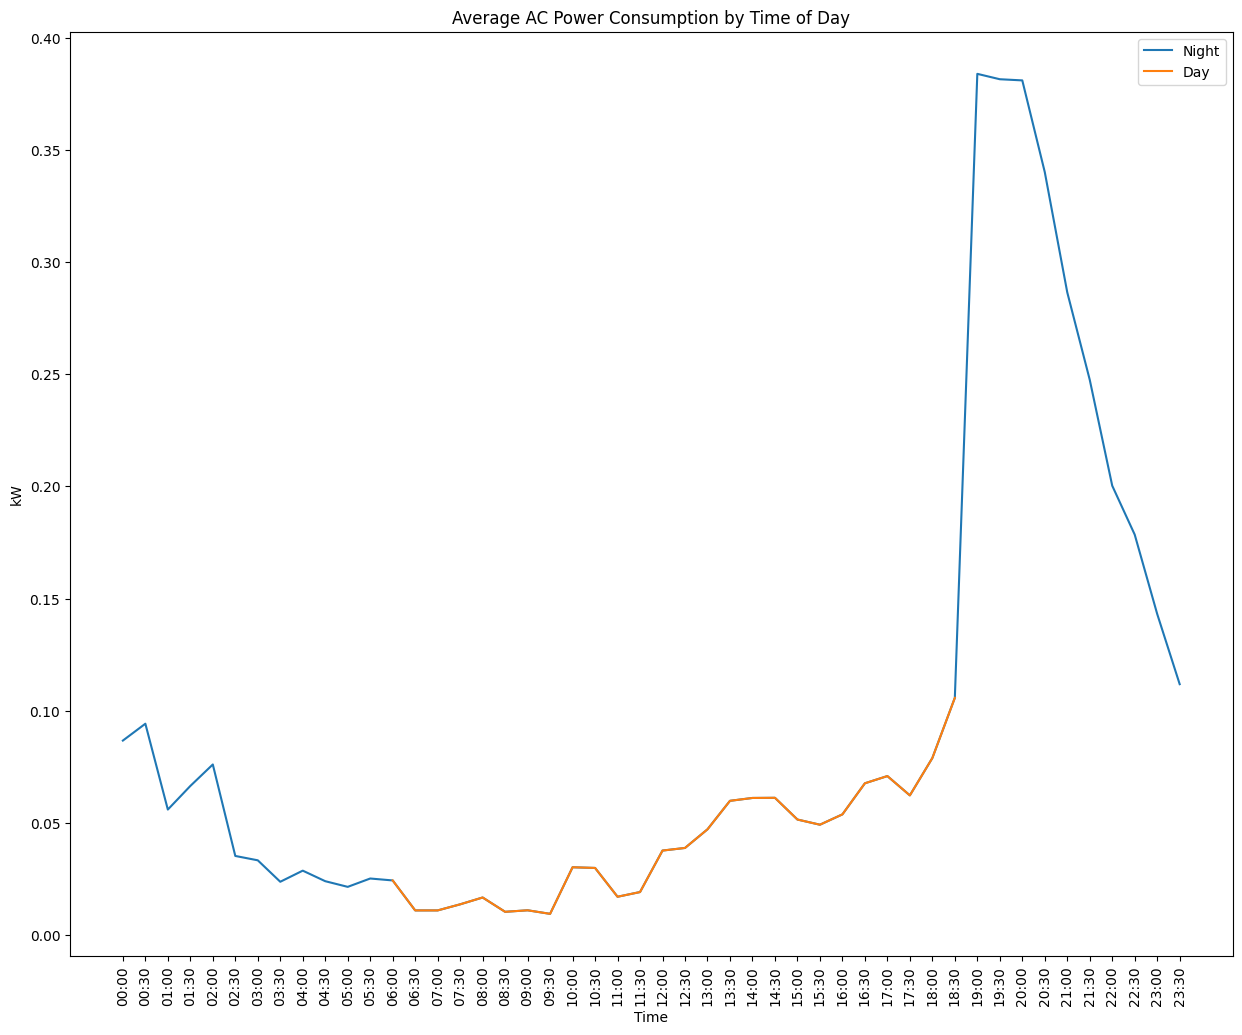

In [26]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (15, 12)  # set the default figure size

energy_df["time"] = [str(i).split()[-1][:-3] for i in energy_df["Date & Time"]]
energy_df_gbtime = energy_df.groupby("time").mean().reset_index()
plt.plot(energy_df_gbtime["time"], energy_df_gbtime["AC [kW]"], label = "Night");
plt.plot(energy_df_gbtime["time"][12:38], energy_df_gbtime["AC [kW]"][12:38], label = "Day");

plt.xticks(rotation=90)

plt.xlabel("Time")
plt.ylabel("kW")
plt.title("Average AC Power Consumption by Time of Day")

plt.legend()
plt.show()


###Contrary to the AC usage pattern, the majority of people tend to use the microwave during the day, with peak hours observed around breakfast and dinner time. It's possible that the peak in usage around breakfast time is related to people heating up their morning coffee or breakfast foods, while the peak around dinner time is related to meal preparation and reheating leftovers.

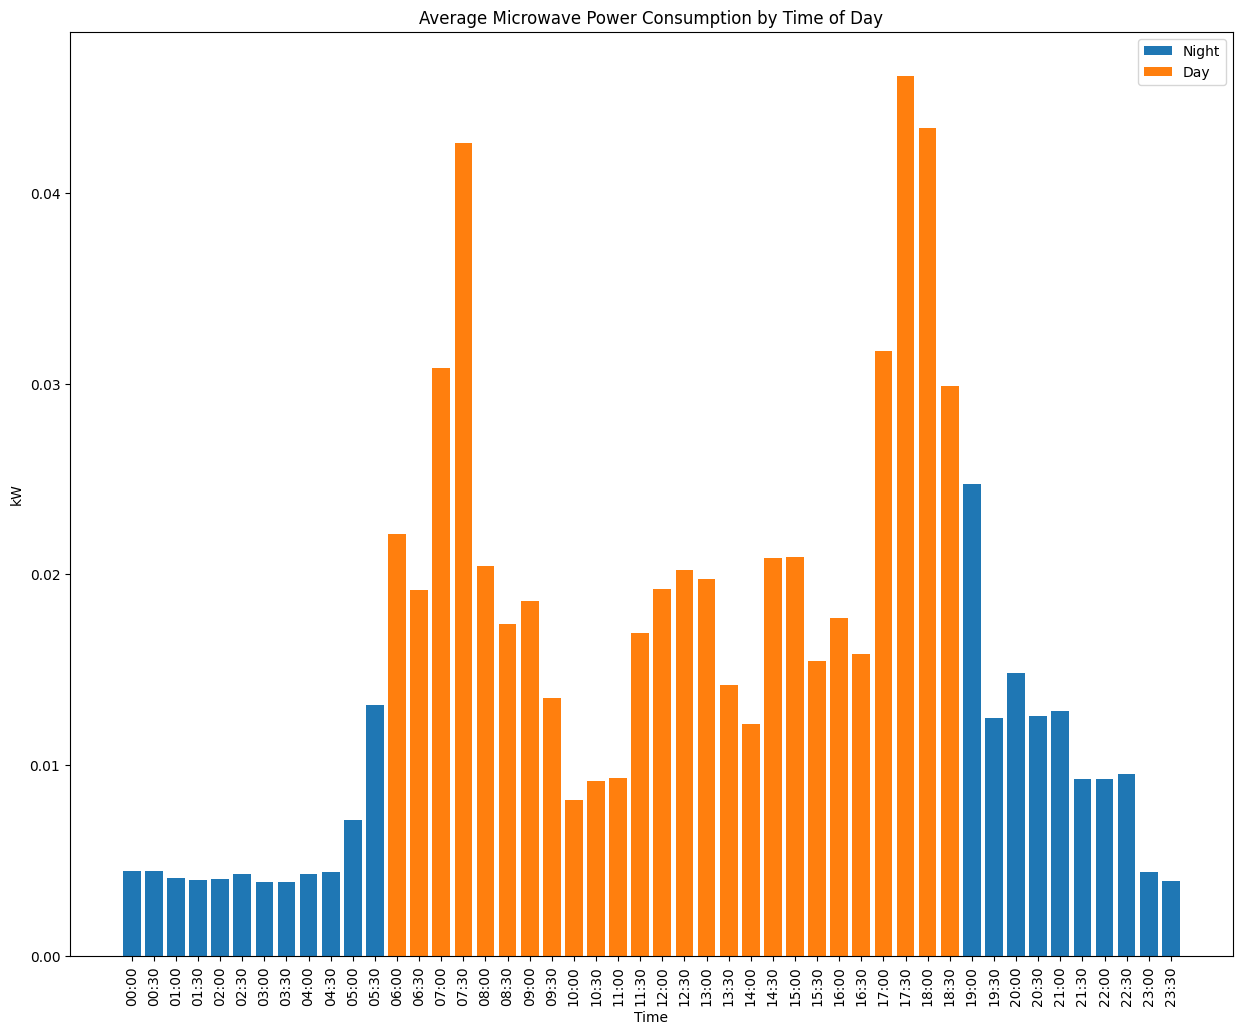

In [27]:
plt.bar(energy_df_gbtime["time"], energy_df_gbtime["Microwave (R) [kW]"], label = "Night");
plt.bar(energy_df_gbtime["time"][12:38], energy_df_gbtime["Microwave (R) [kW]"][12:38], label = "Day");

plt.xticks(rotation=90)

plt.xlabel("Time")
plt.ylabel("kW")
plt.title("Average Microwave Power Consumption by Time of Day")

plt.legend()
plt.show()
